In [3]:
from datetime import date as dt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from data.CurveBuilder import CurveBuilder as cb
from MC_simulation.volSurface import VolatilitySurface as vs
from MC_simulation.MonteCarlo import MCSimulation as MC

In [45]:
curveBuilder = cb(dt(2025,1,1), dt(2025,6,1))
fwd_df = curveBuilder.forwards
fwd_df.head()

,1,2,3,4,5,6,7,8,9,10,...,351,352,353,354,355,356,357,358,359,360
2025-01-02,0.0445,0.0436,0.0427,0.042133,0.0414,0.040667,0.041567,0.04130,0.041033,0.040767,...,0.045911,0.045899,0.045888,0.045876,0.045864,0.045852,0.045841,0.045829,0.045817,0.045806
2025-01-03,0.0444,0.0434,0.0424,0.042200,0.0416,0.041000,0.041683,0.04145,0.041217,0.040983,...,0.046495,0.046485,0.046475,0.046465,0.046455,0.046445,0.046435,0.046425,0.046415,0.046405
2025-01-06,0.0443,0.0435,0.0427,0.042033,0.0413,0.040567,0.041583,0.04135,0.041117,0.040883,...,0.046795,0.046785,0.046775,0.046765,0.046755,0.046745,0.046735,0.046725,0.046715,0.046705
2025-01-07,0.0442,0.0435,0.0428,0.042033,0.0413,0.040567,0.041817,0.04165,0.041483,0.041317,...,0.047395,0.047385,0.047375,0.047365,0.047355,0.047345,0.047335,0.047325,0.047315,0.047305
2025-01-08,0.0441,0.0435,0.0429,0.042167,0.0415,0.040833,0.041800,0.04160,0.041400,0.041200,...,0.047395,0.047385,0.047375,0.047365,0.047355,0.047345,0.047335,0.047325,0.047315,0.047305


In [108]:
n_factors=5
degrees = [2,3,3,2,2]
volSurface = vs(fwd_df, n_factors=5, window_months=3)
princ_vol = volSurface.localVols
fitted_vol = volSurface.polyfit(degrees)

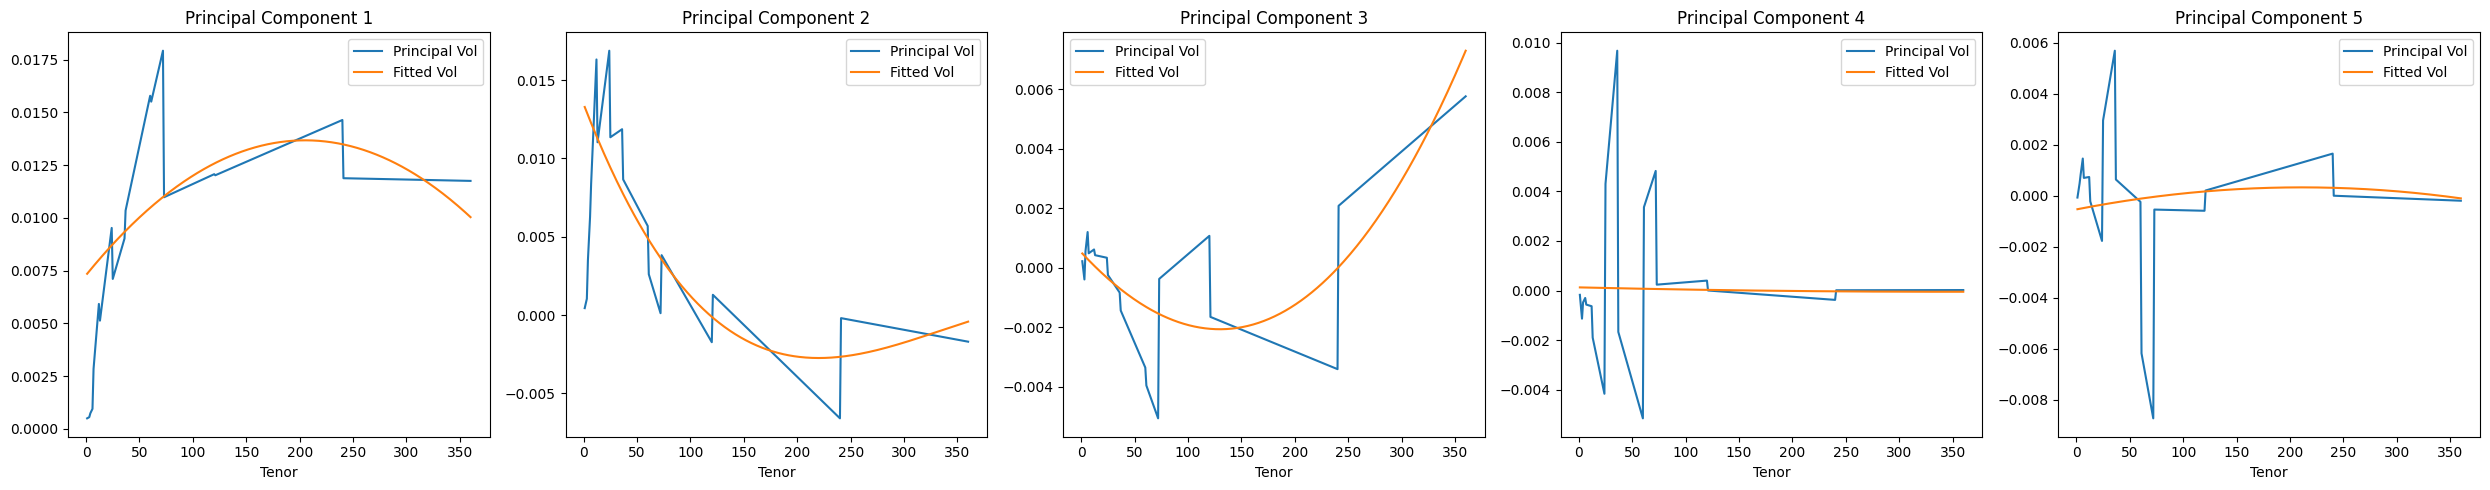

In [109]:
n_factors=5
tenors = volSurface.tenors
test_date = volSurface.timeline[20]

fig, axs = plt.subplots(1, n_factors, figsize=(25, 5), squeeze=False) 
axs = axs.flatten() 

for i in range(n_factors):
    ax = axs[i]
    ax.plot(tenors, princ_vol[test_date].pca[i], label='Principal Vol')
    ax.plot(tenors, fitted_vol[test_date].fittedVols[i], label='Fitted Vol')
    ax.set_title(f'Principal Component {i+1}')
    ax.set_xlabel(r'Tenor')
    ax.legend()

plt.tight_layout()
plt.show()

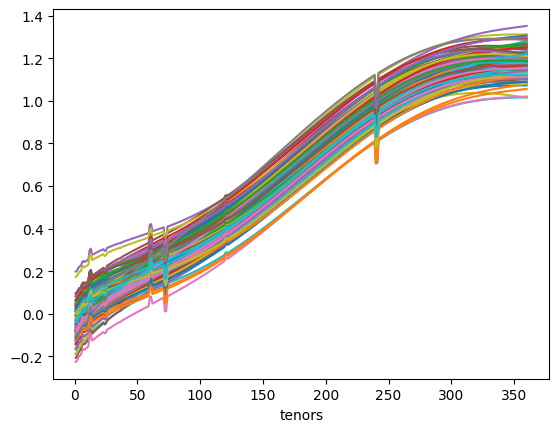

In [104]:
n_paths = 100
paths = MC(volSurface).sim(degrees, paths=n_paths)
for i in range(n_paths):
    plt.plot(tenors, paths[i][20])
    plt.xlabel('tenors')